# Natural Language Processing Exercise

In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
import nltk
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
stop_words = stopwords.words('english')
#nltk.download('stopwords')

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")
tokenized_doc = df['text'].apply(lambda x: x.split())
# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [6]:
# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df['text'] = detokenized_doc

In [7]:
df['text'][0:10]

0    My wife took birthday breakfast excellent The ...
1    I idea people give bad reviews place It goes s...
2    love gyro plate Rice good I also dig candy sel...
3    Rosie Dakota I LOVE Chaparral Dog Park It conv...
4    General Manager Scott Petello good egg Not go ...
5    Quiessence simply put beautiful Full windows e...
6    Drop drive After I ate I go back next day The ...
7    Luckily I travel far make connecting flight An...
8    Definitely come Happy hour Prices amazing sake...
9    Nobuo shows unique talents everything menu Car...
Name: text, dtype: object

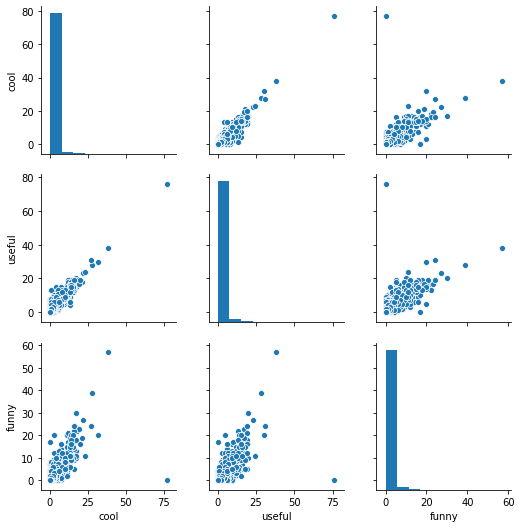

In [8]:
sns.pairplot(df[['cool', 'useful', 'funny']])

In [9]:
sc = MinMaxScaler()
std_cool_fun = sc.fit_transform(df[['cool', 'funny']])

In [10]:
cv = CountVectorizer()
X = cv.fit_transform(df['text'])
X = pd.concat([pd.DataFrame(X.todense()), pd.DataFrame(std_cool_fun)], axis=1)
y = df['stars']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=112)

In [12]:
bayes = MultinomialNB()
bayes.fit(X_train,y_train)
y_pred = bayes.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 59  19  15  43  20]
 [ 16  12  40 102  19]
 [  2   7  26 221  43]
 [  5   3  25 506 171]
 [  3   2   3 282 356]]
              precision    recall  f1-score   support

           1       0.69      0.38      0.49       156
           2       0.28      0.06      0.10       189
           3       0.24      0.09      0.13       299
           4       0.44      0.71      0.54       710
           5       0.58      0.55      0.57       646

    accuracy                           0.48      2000
   macro avg       0.45      0.36      0.37      2000
weighted avg       0.46      0.48      0.44      2000

0.4795
